In [ ]:
#Sub Task 2 
# The two classification algorithms chosen were KNN and MLP 
# The choice was made based on the fact that the test(validation data)
#accuracy of these two algorithms was more than the algorithims 
# like SVC,Perceptron,logistic regression,Naive Bayes


In [30]:
import pandas as pd
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df=pd.read_csv('classification.csv',sep=',',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.994025,0.653002,0.446114,0.292221,1.249029,-0.246995,-0.428670,-0.751658,1.585431,-3.035016,...,-0.629799,0.570696,-0.966352,-0.185106,-0.857529,-0.356192,-1.936440,0.401144,1.153917,1.0
1,0.327973,0.176035,-0.904732,-0.373882,2.604021,0.207785,0.756931,0.618259,0.723490,-0.263568,...,1.482955,-1.639031,1.014630,1.175793,1.560685,-0.368825,1.332361,-0.572449,0.350933,1.0
2,0.403246,-0.205107,-1.380421,2.153790,-1.351427,-0.215740,-1.233797,0.558753,-0.902648,0.519458,...,-0.283883,1.689560,-0.371756,-0.611053,-1.773915,0.192610,0.015297,0.189114,-0.967398,0.0
3,-0.536353,-0.010243,1.642433,2.142179,0.083902,-0.115104,0.496016,1.678353,1.449779,-0.721026,...,-0.712594,-0.640335,1.444946,-0.274072,0.779582,0.377120,-0.484402,0.495000,1.078188,0.0
4,-0.091156,1.738505,-1.120414,-0.253840,-0.960416,-0.934310,-2.796113,-0.303539,-0.627029,-0.923029,...,1.370970,1.832749,-0.764466,-0.798898,-3.144816,0.041235,0.710892,1.701078,-1.190387,1.0


In [4]:
x=df.iloc[:,0:100]
y=df.iloc[:,100]
test_frac=0.33

In [5]:
#Since our aim is to achieve a balance between bias and variance we will use a validation set 
#to evaluate a model's performance during training and prevent overfitting, 
#which is when a model performs well on training data but not on new data
x_dev,x_test,y_dev,y_test=train_test_split(x,y,test_size=test_frac,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_dev,y_dev,test_size=test_frac,random_state=42)

In [18]:
#using a helper function to reduce our effort 
def predict_class(classifier,x_train,y_train,x_test,y_test):
    scaler = StandardScaler()# using it since it will improve performance of KNN and MLP
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    model = classifier.fit(x_train_scaled, y_train)
    train_acc=model.score(x_train_scaled,y_train)
    test_acc=model.score(x_test_scaled,y_test)
    return{'train_acc': train_acc,'test_acc':test_acc}
    
    

In [19]:
# First choice of model is KNN 
res=predict_class(KNeighborsClassifier(),x_train,y_train,x_val,y_val)
print(res)

{'train_acc': 0.8738738738738738, 'test_acc': 0.8214285714285714}


In [ ]:
# The training accuracy is not too high and test accuracy(model tested on validation set ) is also decent
# it means model is performing well on unseen data 
# Therefore we conclude there is no sign of overfitting
# Since training accuracy is decent, we can conclude 
# Undefitting is not the risk in our KNN model
#Also as for considering dimensionality of dataset, we can see the performance is decent, due to which 
#there does not seem the need to consider reducing dimesionality using PCA in order for the model to perform better

In [63]:
#using the test data since we have decided the model and looked for bias-variance balance
res=predict_class(KNeighborsClassifier(),x_train,y_train,x_test,y_test)
print(res)

{'train_acc': 0.8738738738738738, 'test_acc': 0.8795180722891566}


In [20]:
#The second choice of Classification Algorithm is MLP 
#using a random number for nodes=90
res=predict_class(MLPClassifier(hidden_layer_sizes=(90,),random_state=42),x_train,y_train,x_val,y_val)
print(res)

{'train_acc': 1.0, 'test_acc': 0.7857142857142857}


In [40]:
# helper functions 
def predict_class_labels(classifier,x_train,y_train,x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    model = classifier.fit(x_train_scaled, y_train)
   
    y_pred = model.predict(x_test_scaled)
    
   
    
    return y_pred

In [41]:
# Display results like confusion matrix and classification report
def display_model_results_full(title,classifier,x_train,y_train,x_test,y_test):
    print(title + '. Full results')

    y_pred = predict_class_labels(classifier,x_train,y_train,x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=classifier.classes_).plot()
    plt.show() 
    
    print(classification_report(y_test, y_pred))
    print('\n')

In [35]:
#helper function for displaying results in brief
def display_model_results_brief(title,classifier,x_train,y_train,x_test,y_test):
    print(title + '. Brief results')
    
    y_pred = predict_class_labels(classifier,x_train,y_train,x_val)
    
    print('f1 score: {}'.format(f1_score(y_test,y_pred,average='macro')))
    print('accuracy: {}'.format(accuracy_score(y_test,y_pred)))
    print('\n')

In [32]:
#using a range to decide what should be number of nodes based on accuracy score and f1 score
for i in range(10,101,10):
    display_model_results_brief('{} nodes in hidden layer'.format(i),
                                MLPClassifier(hidden_layer_sizes=(i),max_iter=1000,random_state=42),
                                x_train,y_train,x_val,y_val)

10 nodes in hidden layer. Brief results
f1 score: 0.7468409586056645
accuracy: 0.7469879518072289


20 nodes in hidden layer. Brief results
f1 score: 0.7705514331441874
accuracy: 0.7710843373493976


30 nodes in hidden layer. Brief results
f1 score: 0.746987951807229
accuracy: 0.7469879518072289


40 nodes in hidden layer. Brief results
f1 score: 0.7941047716328615
accuracy: 0.7951807228915663


50 nodes in hidden layer. Brief results
f1 score: 0.7828488372093023
accuracy: 0.7831325301204819


60 nodes in hidden layer. Brief results
f1 score: 0.7828488372093023
accuracy: 0.7831325301204819


70 nodes in hidden layer. Brief results
f1 score: 0.7828488372093023
accuracy: 0.7831325301204819


80 nodes in hidden layer. Brief results
f1 score: 0.7828488372093023
accuracy: 0.7831325301204819


90 nodes in hidden layer. Brief results
f1 score: 0.7947039138658518
accuracy: 0.7951807228915663


100 nodes in hidden layer. Brief results
f1 score: 0.7947039138658518
accuracy: 0.7951807228915663




In [44]:
# At no of nodes 40 and 100 the results peaked
#lets dive into the range of 40 nodes
for i in range(35,50):
    display_model_results_brief(
        '{} nodes in hidden layer'.format(i),
        MLPClassifier(hidden_layer_sizes=(i),max_iter=1000,random_state=42),
        x_train,y_train,x_val,y_val)

35 nodes in hidden layer. Brief results
f1 score: 0.7786561264822136
accuracy: 0.7857142857142857


36 nodes in hidden layer. Brief results
f1 score: 0.8379942140790742
accuracy: 0.8392857142857143


37 nodes in hidden layer. Brief results
f1 score: 0.7659916425586628
accuracy: 0.7678571428571429


38 nodes in hidden layer. Brief results
f1 score: 0.7786561264822136
accuracy: 0.7857142857142857


39 nodes in hidden layer. Brief results
f1 score: 0.78125
accuracy: 0.7857142857142857


40 nodes in hidden layer. Brief results
f1 score: 0.7846153846153845
accuracy: 0.7857142857142857


41 nodes in hidden layer. Brief results
f1 score: 0.8205128205128205
accuracy: 0.8214285714285714


42 nodes in hidden layer. Brief results
f1 score: 0.800453514739229
accuracy: 0.8035714285714286


43 nodes in hidden layer. Brief results
f1 score: 0.7250409165302782
accuracy: 0.7321428571428571


44 nodes in hidden layer. Brief results
f1 score: 0.7278911564625851
accuracy: 0.7321428571428571


45 nodes in 

41 nodes in hidden layer. Full results


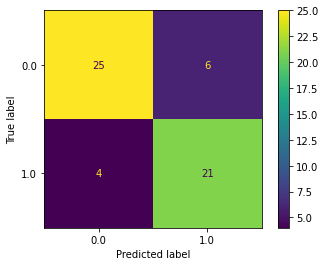

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83        31
         1.0       0.78      0.84      0.81        25

    accuracy                           0.82        56
   macro avg       0.82      0.82      0.82        56
weighted avg       0.82      0.82      0.82        56





In [45]:
#Best score observed with 41 nodes in the hidden layer. Let's look at the result in more detail.
display_model_results_full(
    '41 nodes in hidden layer',
    MLPClassifier(hidden_layer_sizes=(41,),max_iter=1000,random_state=42),
    x_train,y_train,x_val,y_val)

In [47]:
#The choice of nodes is 41 
res=predict_class(MLPClassifier(hidden_layer_sizes=(41,),random_state=42,max_iter=1000),x_train,y_train,x_val,y_val)
print(res)

{'train_acc': 1.0, 'test_acc': 0.8214285714285714}


In [ ]:
# As it is clear from trainig accuracy that a score of 1 is acheived 
# Which is a perfect score, it indicates overfitting
# model is performing exceedingly well on the training data 
#As for the unseen data from validation set the model's performance is decent 
#So in order to prevent this overfitting, we will regularize the parameter alpha 
#And test the training and validation accuracy 


Best validation accuracy 0.8035714285714286 at alpha =10 


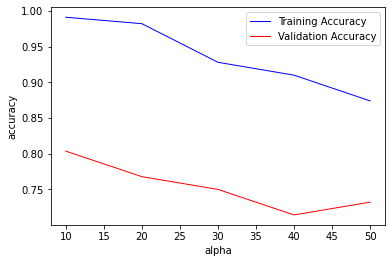

In [61]:
alphas=np.arange(10,60,10)
train_acc=[]
val_acc=[]
for alpha_val in alphas:
    res=predict_class(MLPClassifier(hidden_layer_sizes=(41,),random_state=42,alpha=alpha_val,max_iter=1000),x_train,y_train,x_val,y_val)
    train_acc.append(res['train_acc'])
    val_acc.append(res['test_acc'])
index_min=np.argmax(val_acc)
print('Best validation accuracy {} at alpha ={} '.format(val_acc[index_min],alphas[index_min]))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(alphas,train_acc,color='blue',linewidth=1,label='Training Accuracy')
plt.plot(alphas,val_acc,color='red',linewidth=1,label='Validation Accuracy')
plt.legend()

In [ ]:
# the best validation accuracy is found at alpha =10 but the traning accuracy is very high at alpha=10
#This is due to overfitting
#as the alpha increases, the high variance is fixed as we can see the training accuracy is decreasing
#the margin between traning and validation accuracy is getting decreased 
#by this we can say at around alpha=50 , we are getting a model 
#which is more genralizable as the traning accuracy isnt too high and the validation accuracy is quite decent around.74

In [64]:
#the choice of alpha is 50 , now we can use the test data
res=predict_class(MLPClassifier(hidden_layer_sizes=(41,),random_state=42,alpha=50,max_iter=1000),x_train,y_train,x_test,y_test)
print(res)

{'train_acc': 0.8738738738738738, 'test_acc': 0.7469879518072289}


In [ ]:
#As for considering dimensionality of dataset, we can see the performance is decent, due to which 
#there does not seem the need to consider reducing dimesionality using PCA in order for the model to perform better